In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

#GRADIENT DESCENT

In [ ]:
# The gradient_descent implementation.
# We don't know the final length of the arrays because the gradient can 
# converge early than expected. So we put a limit on the maxium number of iteration
def gradient_descent(f, grad_f, x0, kmax, tolf, tolx, alpha, backtrack = False):
    # Initialization
    k = 0
    n = int(x0.shape[0])
    x = np.zeros((kmax + 1, n))
    f_val = np.zeros((kmax + 1, ))
    grads = np.zeros((kmax + 1, n))
    err = np.zeros((kmax + 1, ))
    
    # Assign the values for the first iteration, start point(k=0)
    x[k, :] = x0
    f_val[k] = f(x[k, :])
    grads[k, :] = grad_f(x[k, :])
    # the err is a vector, because it's the norm of the gradient   
    err[k] = np.linalg.norm(grads[k, :])
    
    # Choose step size
    alpha = alpha
    
    # Handle the condition for the first iteration (x[k,:] - x[k-1,:])
    
    if k == 0:
        x[k-1, :] = np.ones((n,))
        #x[k-1, :] = x[-1, :]
        
    
    # Start the iterations
    while ((k < kmax) and (err[k] >= (tolf * err[0])) and (np.linalg.norm(x[k,:] - x[k-1,:]) >= tolx)):
        # Update the value of x
        x[k+1, :] = x[k, :] - alpha * grads[k, :]
        
        # Update the step size alpha with backtracking, it computes a good alpha which ensures the convergence of the gradient
        if(backtrack):
          alpha = backtracking(f, grad_f, x[k, :])
        
        # Update the values of the actual iteration
        k = k+1
        f_val[k] = f(x[k, :]) 
        grads[k, :] = grad_f(x[k, :])
        err[k] = np.linalg.norm(grads[k, :])
    
    # Truncate the vectors that are (eventually) too long because maybe we have reached the convergence before the stopping value kmax
    x = x[:k+1, :] 
    f_val = f_val[:k+1]
    grads = grads[: k+1]
    err = err[: k+1]
    
    return x, k, f_val, grads, err

In [ ]:
def plot_contour(x,alpha=None):
  x_ax = np.linspace(-5, 4, 100) # [-5, 4] = [a,b] interval which will contain 100 points
  y_ax = np.linspace(-6, 6, 100) # [-6, 6] = [c,d]
  xv, yv = np.meshgrid(x_ax, y_ax) #corresponds to the points in the grid
  z_ax = f([xv,yv]) 
  if(alpha != None):
    plt.title(f'GD with alpha: {alpha}')
  else:
    plt.title(f'GD with backtracking')
  contours = plt.contour(x_ax, y_ax, z_ax)
  plt.plot(x[:,0], x[: , 1], '-o' ) #used to show the path of the gradient 
  plt.show()
  #show plot with different values of alpha like, 1(diverges), 1e-4( not moving enough) and also the behaviour 
  #with backtracking, backtracking chooses the right step-size to go to the minimum smoothly without bouncing too much

In [ ]:
def execute(f, grad_f, x0, kmax, tolf, tolx,x_truth = None, alpha = 0.1, backtrack = False):
  x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx,alpha, backtrack = backtrack)
  print(k)
  truth_err = []
  if (x_truth != None):
    for a in x:
      truth_err.append(np.linalg.norm(a-x_truth))
    #print(f"x: {a}, truth: {x_truth}")
    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize=(8, 5))
    fig.tight_layout(h_pad=4)
    if(not backtrack):
      plt.title(f'alpha: {alpha}')
      fig.suptitle(f'GD without backtracking with alpha: {alpha}')
      
    else:
      fig.suptitle('GD with backtracking')

    ax1.set(xlabel='k', ylabel='error')
    ax1.set_title("Error on the gradient")
    ax1.plot(err)

    ax2.set(xlabel='k', ylabel='trutherror')
    ax2.set_title("Error wrt the truth value:")
    ax2.plot(truth_err)
    
    plt.subplots_adjust(top=0.85)
  else:
    if(not backtrack):
      plt.title(f'GD without backtracking with alpha: {alpha}')
      #fig.suptitle(f'GD without backtracking with alpha: {alpha}')
    else:
      plt.title('GD with backtracking')
    
    plt.plot(err)
    plt.xlabel('k')
    plt.ylabel('error')
    plt.show()
  
  return x
  #plt.show()

##Function 1

In [ ]:
#Exercise 1:
def f(x):
    return ((x[0]-3)**2 + (x[1] - 1)**2)


def grad_f(x):
   # gf = np.empty_like(x)
    #gf[0] = (2*(x[0]- 1))
    #gf[1] = (2*(x[1]-1))
    return np.array([2*(x[0]- 3), 2*(x[1]-1)])

n = 2
#intialization
x0 = np.zeros((n, ))
alpha = [1 ,0.1, 1e-2, 1e-4]
kmax = 100
tolf = 1e-6
tolx = 1e-5
x_truth = [3,1]


100
51
100
100
80


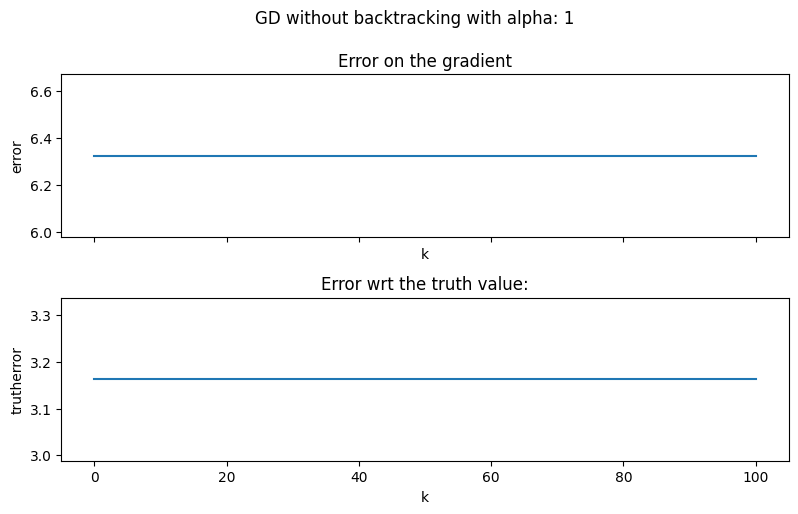

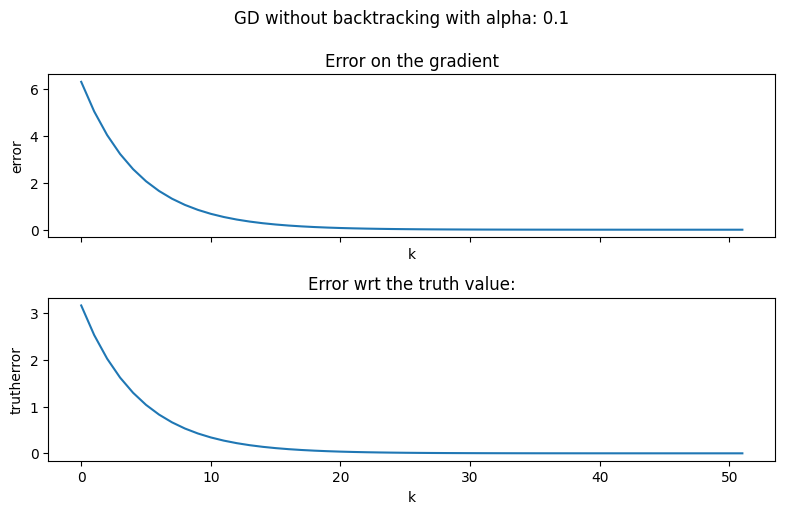

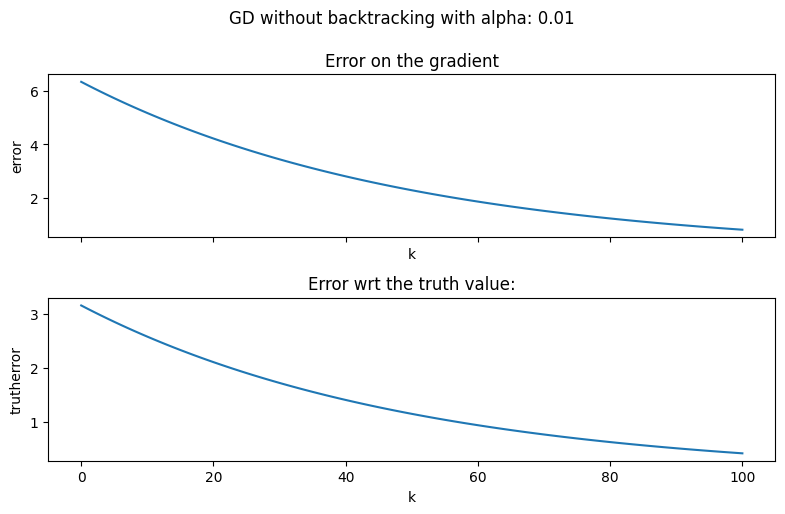

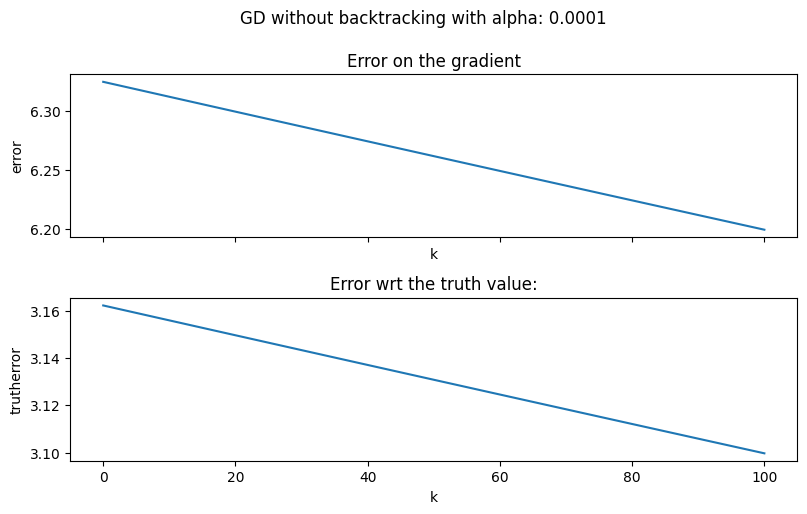

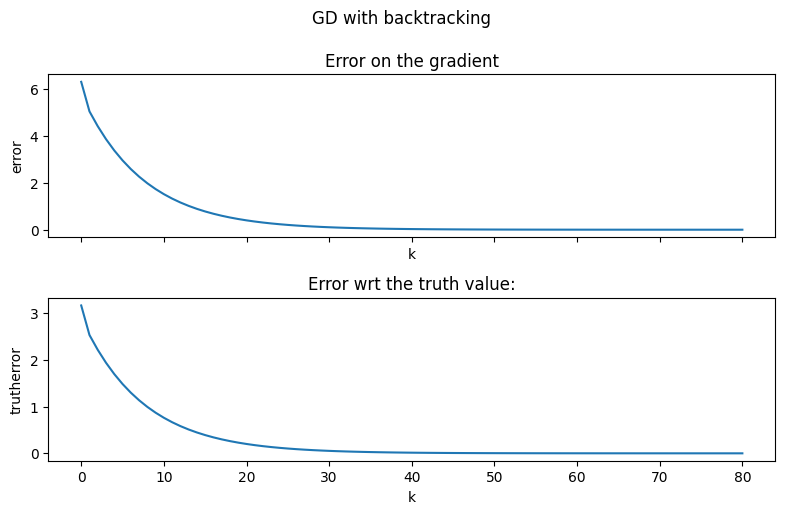

In [ ]:
x_alpha = list()
for a in alpha:
  x = execute(f, grad_f, x0, kmax, tolf, tolx, x_truth, a, backtrack = False)
  x_alpha.append(x)
  

x_backtrack = execute(f, grad_f, x0, kmax, tolf, tolx, x_truth, backtrack = True)


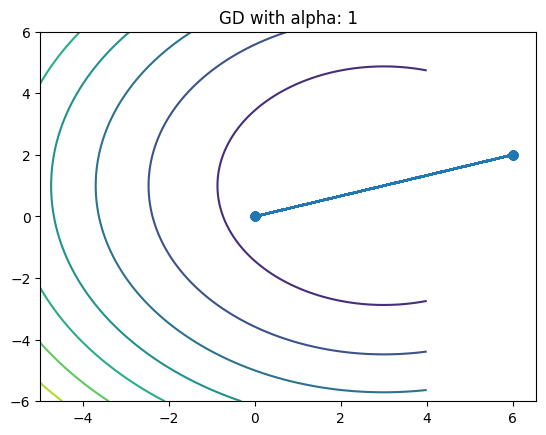

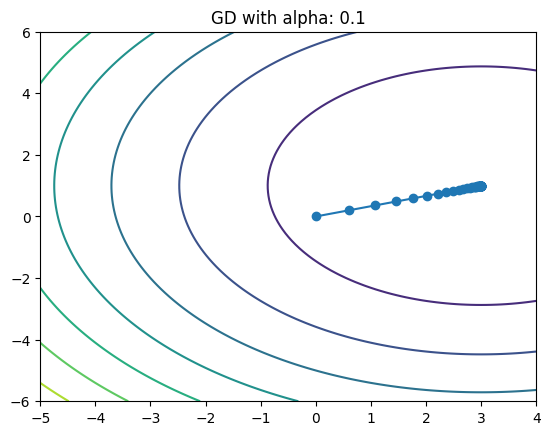

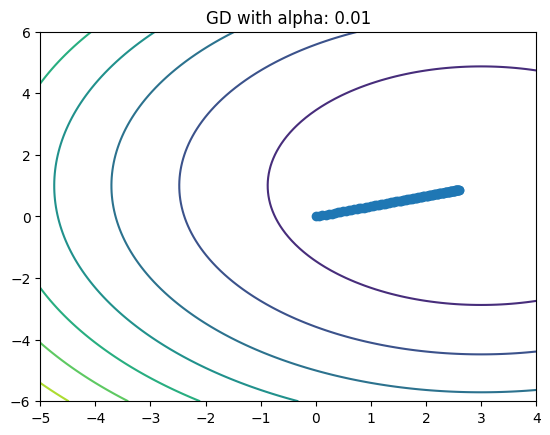

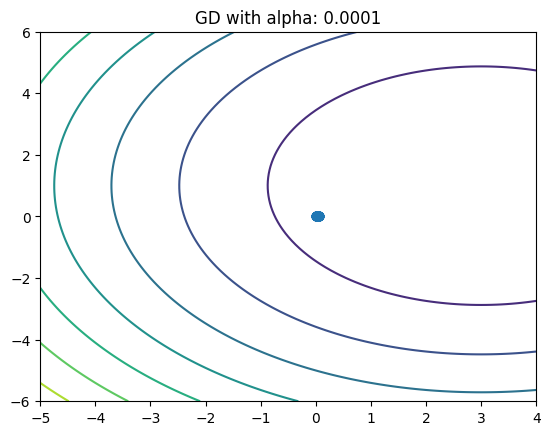

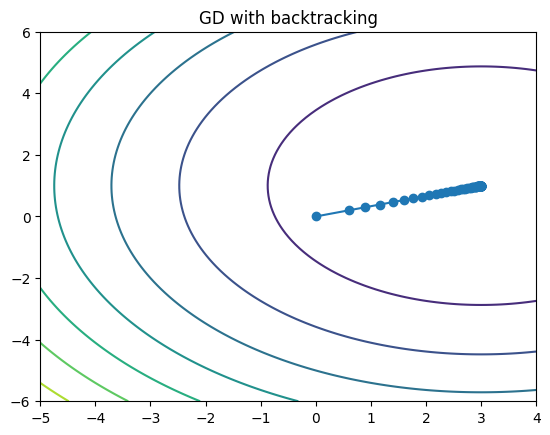

In [ ]:
#plot contours without and with backtracking
for a,x in zip(alpha,x_alpha):
  plot_contour(x,a)
plot_contour(x_backtrack)

##Function 2

In [ ]:
#Exercise 2:
def f(x):
    return (10*(x[0]-1)**2 + (x[1]-2)**2)


def grad_f(x):
   # gf = np.empty_like(x)
    #gf[0] = (2*(x[0]- 1))
    #gf[1] = (2*(x[1]-1))
    return np.array([20*(x[0]- 1), 2*(x[1]-2)])

n = 2

x0 = np.zeros((n, ))
x_truth = [1,2]
kmax = 100
tolf = 1e-6
tolx = 1e-5


100
100
100
100
83


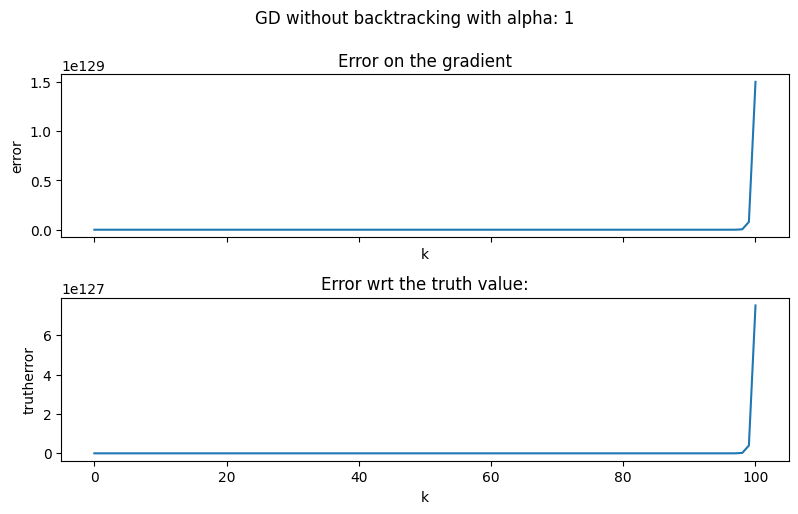

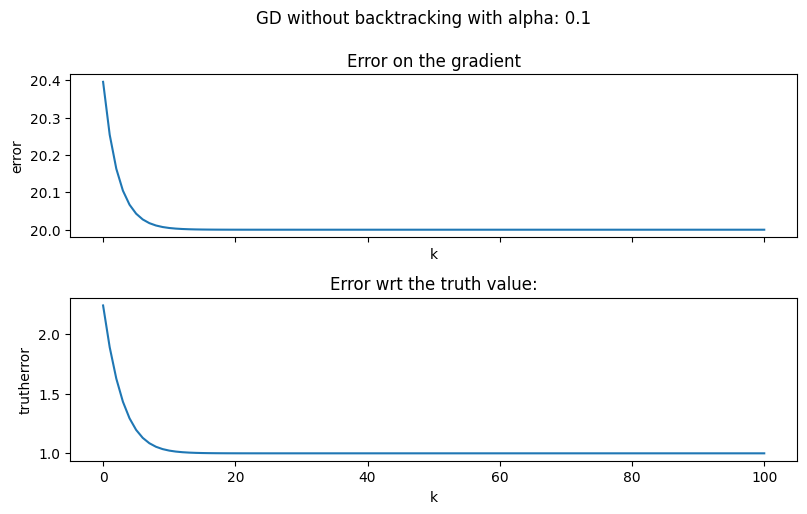

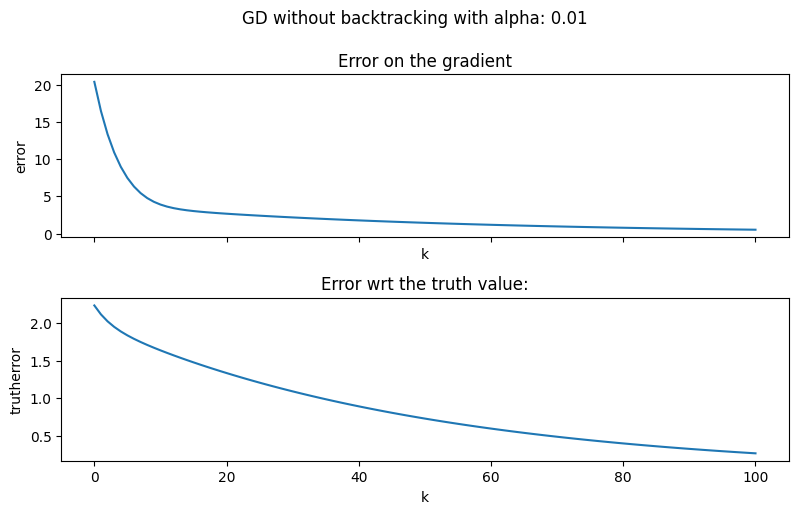

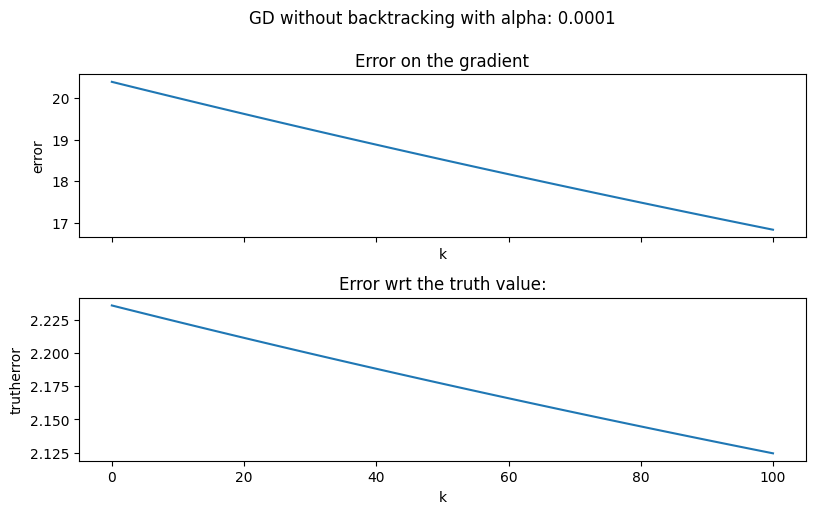

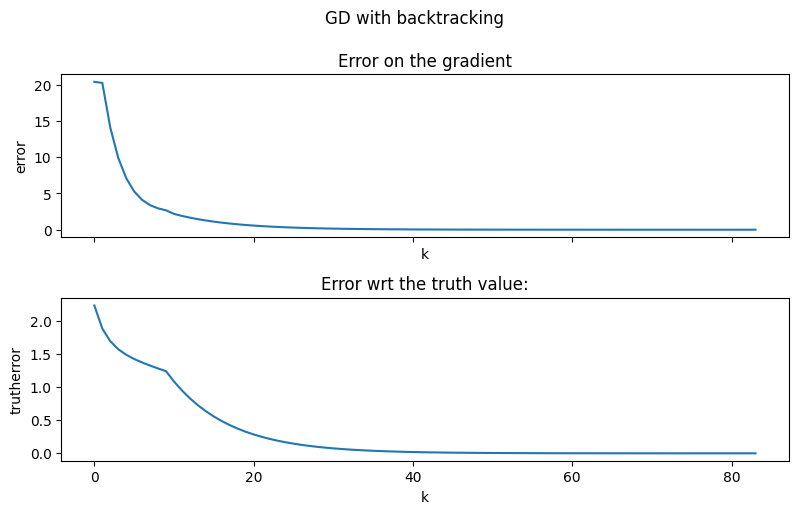

In [ ]:
x_alpha = list()
for a in alpha:
  x = execute(f, grad_f, x0, kmax, tolf, tolx, x_truth, a, backtrack = False)
  x_alpha.append(x)
  

x_backtrack = execute(f, grad_f, x0, kmax, tolf, tolx, x_truth, backtrack = True)

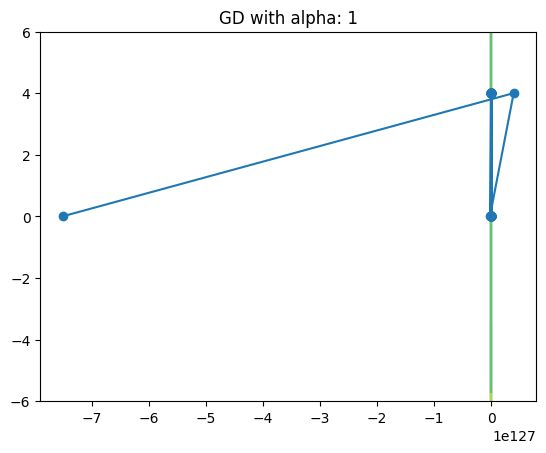

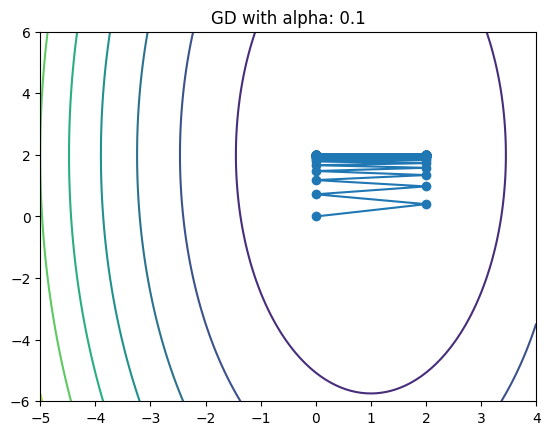

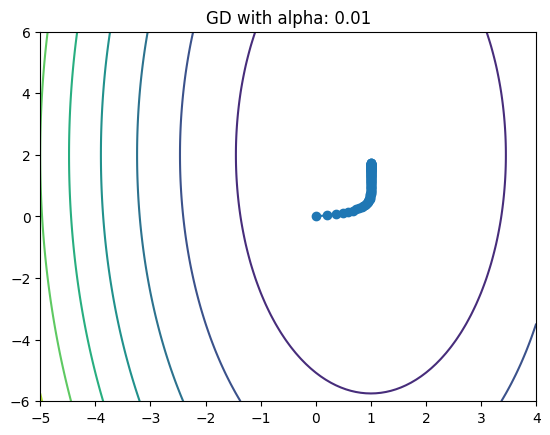

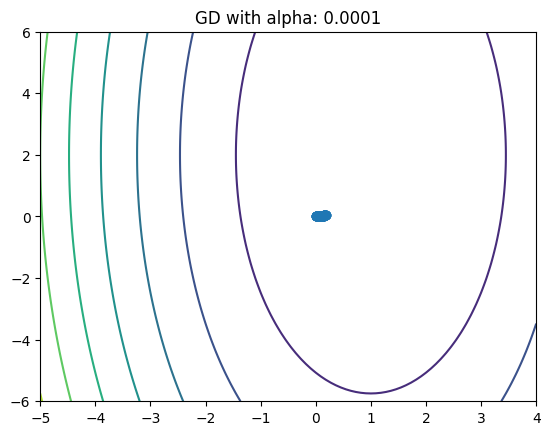

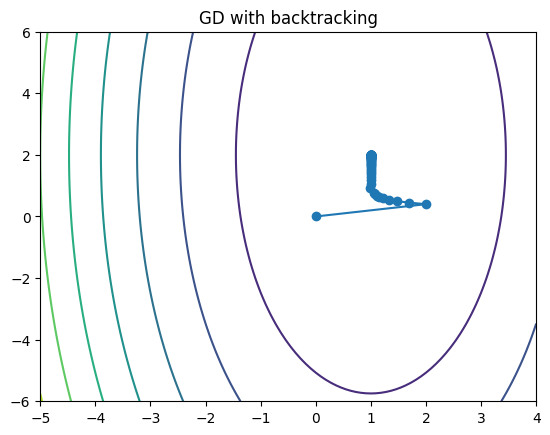

In [ ]:
#plot contours without and with backtracking
for a,x in zip(alpha,x_alpha):
  plot_contour(x,a)
plot_contour(x_backtrack)

As we can see form the last figure, the backtracking algorithm for finding the learning rate works quite well, because it finds the optimal point in a limited number of steps, but it is influenced by the inital value of alpha, which in this case is too high and so the number of steps before reaching the optimal point are greater. 

##Function 3

In [ ]:
#Function 3
n = 5
v = np.linspace(0, 1, n)
print(v)
A = np.vander(v, n)
x_truth = np.ones(n)
b = A @ x_truth


def f(x):
    return 0.5 * np.linalg.norm(A@x - b, 2) ** 2


def grad_f(x):
    return A.T@(A@x-b) 


x0 = np.zeros((n, ))

kmax = 100
tolf = 1e-6
tolx = 1e-5

[0.   0.25 0.5  0.75 1.  ]


100
100
100
100
100


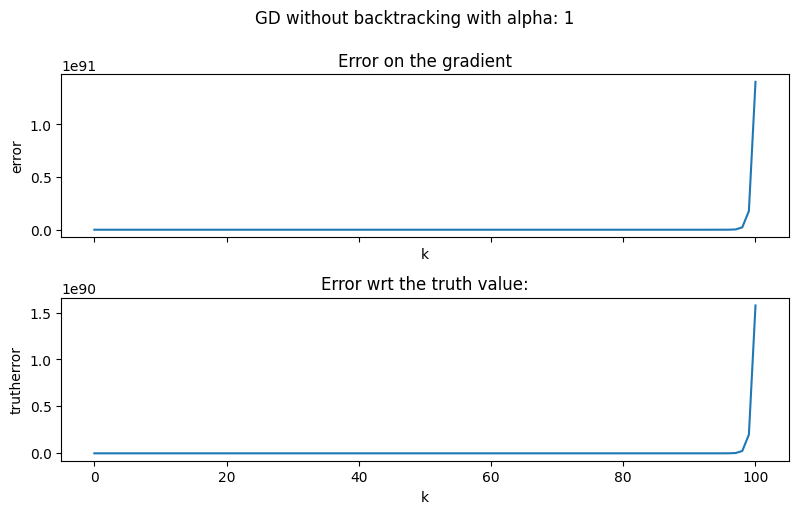

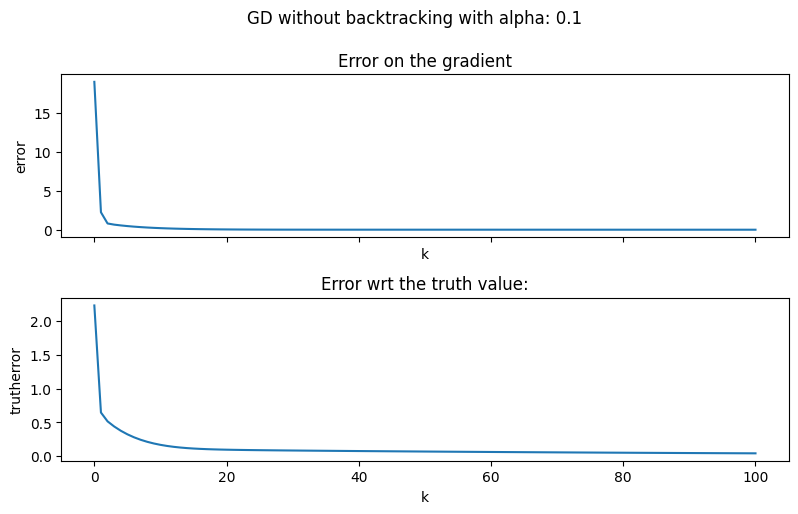

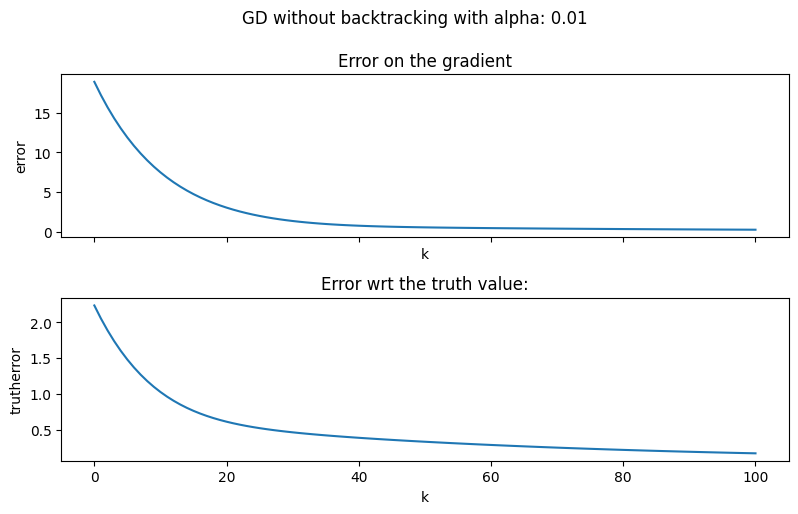

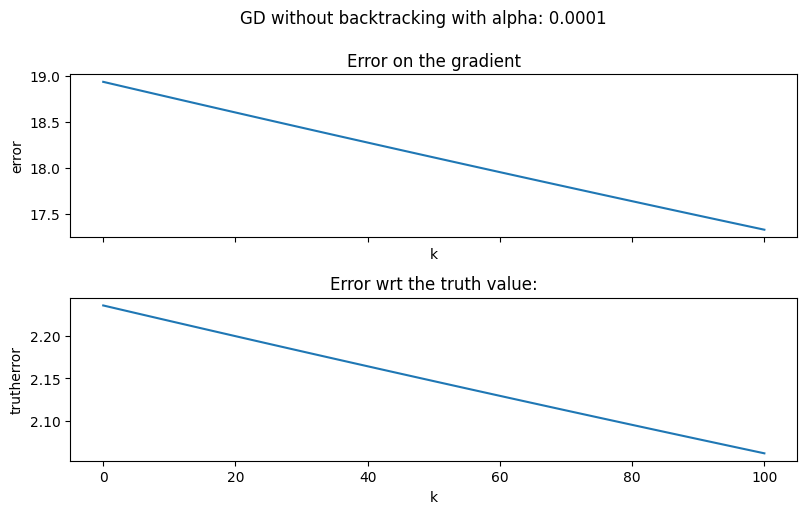

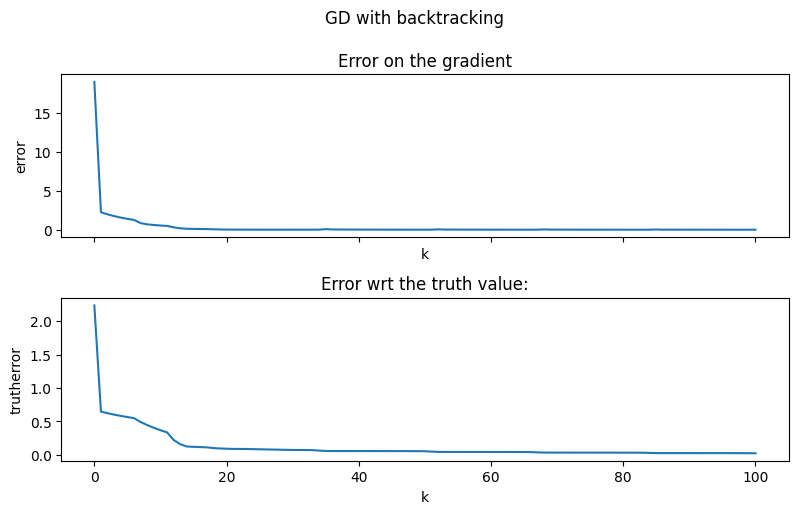

In [ ]:
x_alpha = list()
for a in alpha:
  x = execute(f, grad_f, x0, kmax, tolf, tolx, x_truth, a, backtrack = False)
  x_alpha.append(x)
x_backtrack = execute(f, grad_f, x0, kmax, tolf, tolx, x_truth, backtrack = True)


##Function 4

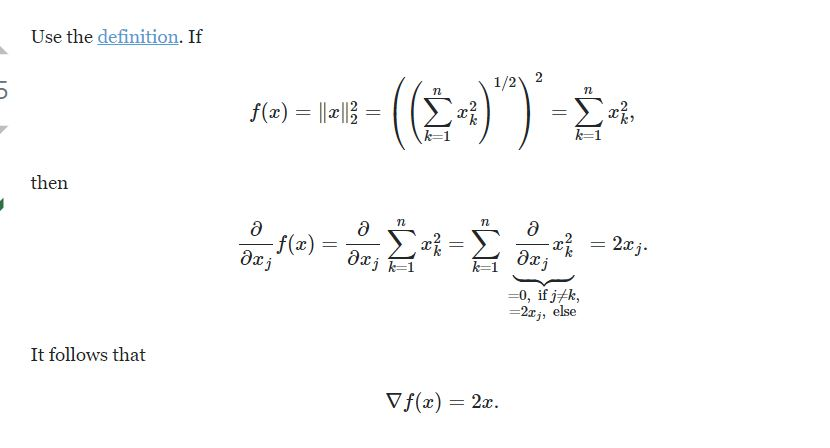

In [ ]:
#Function 4
n = 5
v = np.linspace(0, 1, n)
print(v)
A = np.vander(v, n)
x_truth = np.ones(n)
b = A @ x_truth
l = 0.3 #lamda between [0,1]

def f(x):
    return 0.5 * np.linalg.norm(A@x - b, 2) ** 2 + l * 0.5 * np.linalg.norm(x)**2


def grad_f(x):
    return A.T@(A@x-b) + l*x


x0 = np.zeros((n, ))

kmax = 100
tolf = 1e-6
tolx = 1e-5
x0

[0.   0.25 0.5  0.75 1.  ]


array([0., 0., 0., 0., 0.])

100
42
100
100
100


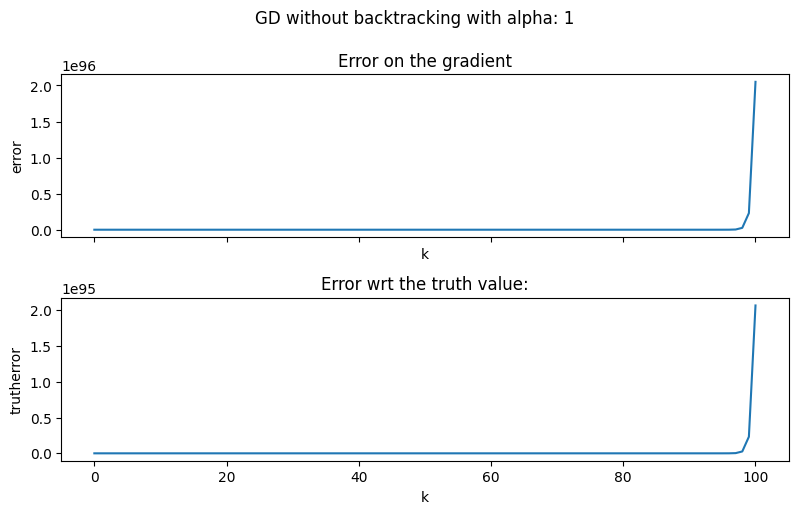

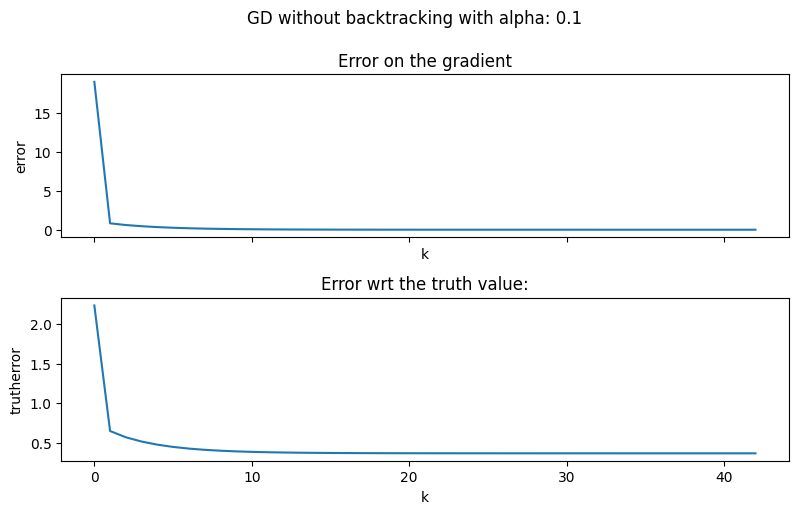

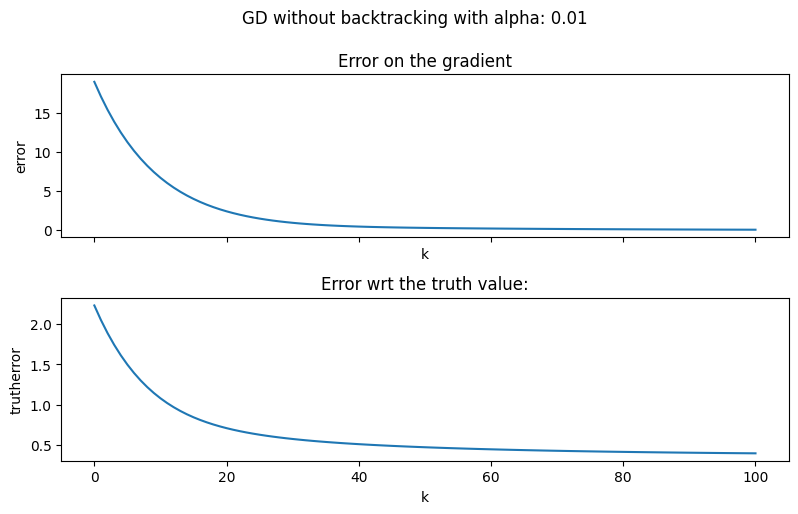

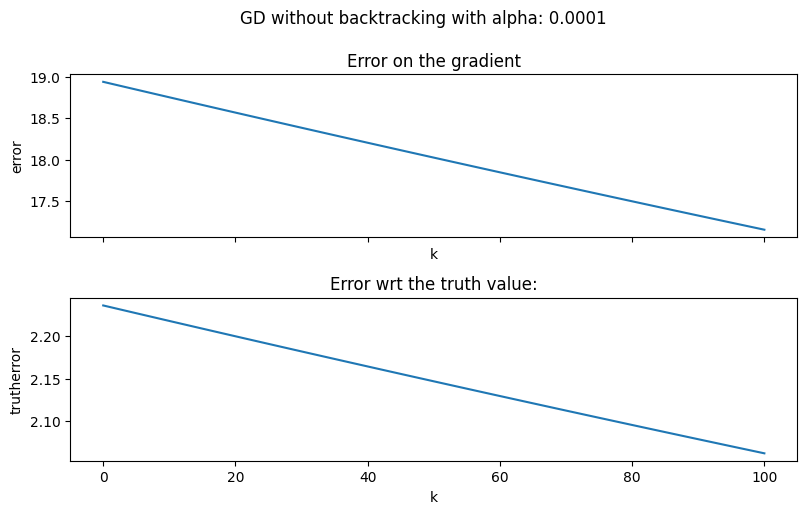

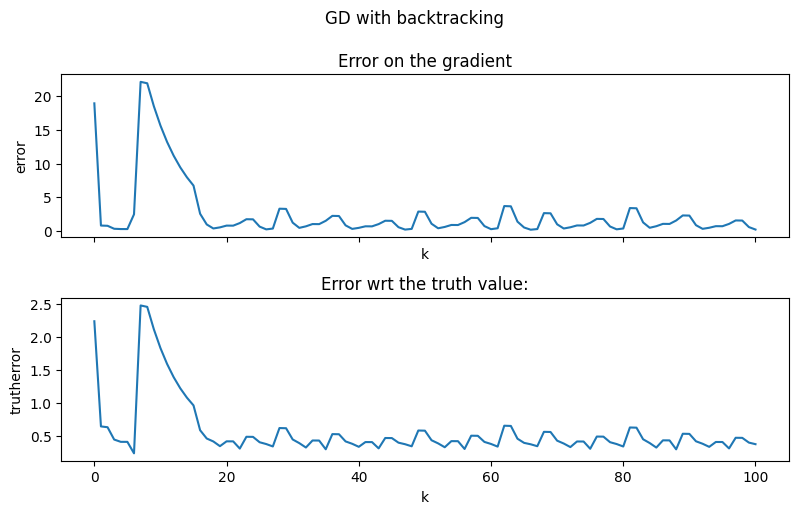

In [ ]:
x_alpha = list()
for a in alpha:
  x = execute(f, grad_f, x0, kmax, tolf, tolx, x_truth, a, backtrack = False)
  x_alpha.append(x)
x_backtrack = execute(f, grad_f, x0, kmax, tolf, tolx, x_truth, backtrack = True)

##Function 5

In [ ]:
#Function 5
def f(x):
    return (x[0]**4)+(x[0]**3)-2*(x[0]**2)-2*x[0]

def grad_f(x):
    return 4*(x[0]**3)+3*(x[0]**2)-4*x[0]-2

n = 1
alpha = [0.1, 1e-2]
x0 = np.linspace(-3,3,7) 
x0 = [np.array((x,)) for x in x0]
kmax = 100
tolf = 1e-6
tolx = 1e-5
x0

[array([-3.]),
 array([-2.]),
 array([-1.]),
 array([0.]),
 array([1.]),
 array([2.]),
 array([3.])]

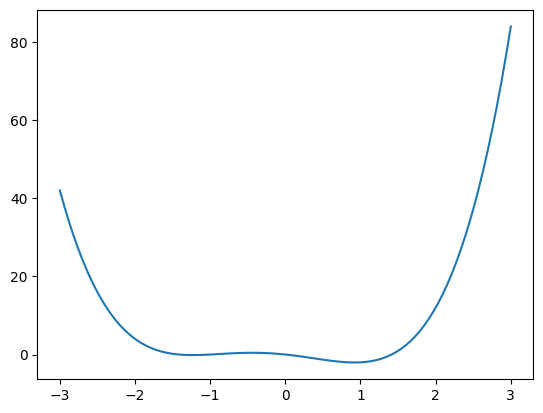

In [ ]:
#plot the non convex function in the interval [-3,3]
x  = np.linspace(-3,3,100)
y = [f((z,)) for z in x]
plt.plot(x,y)
plt.show()


[0.1, 0.01]
Alpha: 0.1, x0: [-3.]
8


<ipython-input-62-3181454e6298>:3: RuntimeWarning: overflow encountered in double_scalars
  return (x[0]**4)+(x[0]**3)-2*(x[0]**2)-2*x[0]
<ipython-input-62-3181454e6298>:3: RuntimeWarning: invalid value encountered in double_scalars
  return (x[0]**4)+(x[0]**3)-2*(x[0]**2)-2*x[0]
<ipython-input-62-3181454e6298>:6: RuntimeWarning: overflow encountered in double_scalars
  return 4*(x[0]**3)+3*(x[0]**2)-4*x[0]-2
<ipython-input-62-3181454e6298>:6: RuntimeWarning: invalid value encountered in double_scalars
  return 4*(x[0]**3)+3*(x[0]**2)-4*x[0]-2


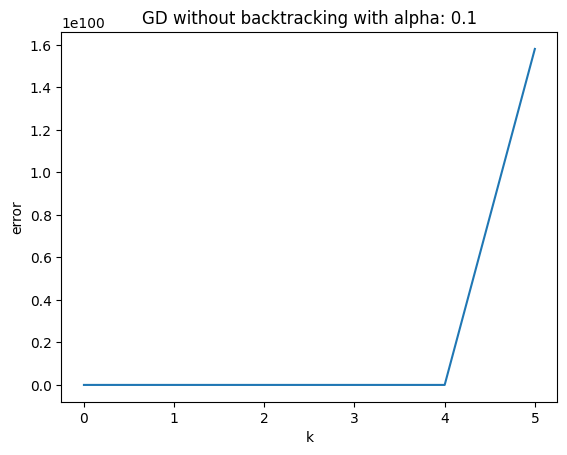

Alpha: 0.01, x0: [-3.]
100


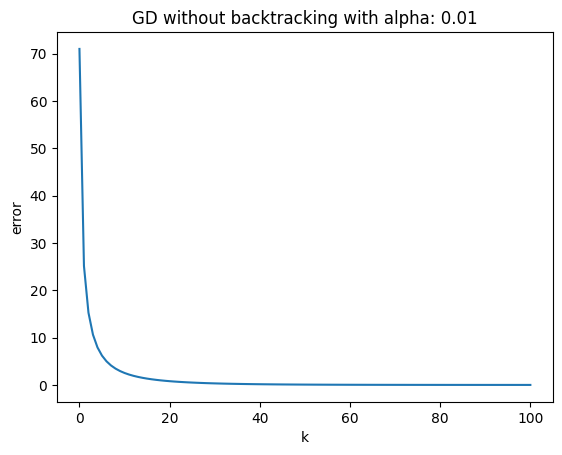

Alpha: 0.1, x0: [-2.]
16


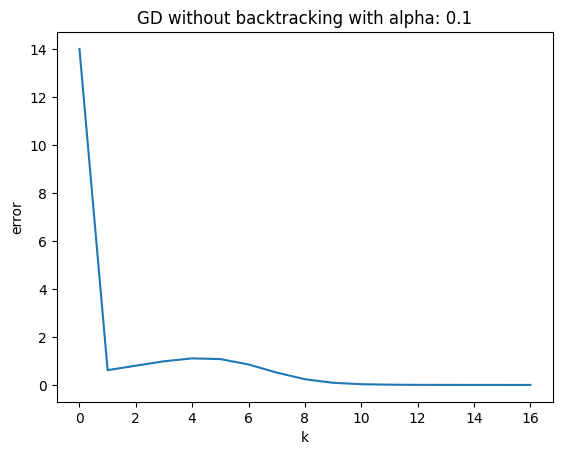

Alpha: 0.01, x0: [-2.]
100


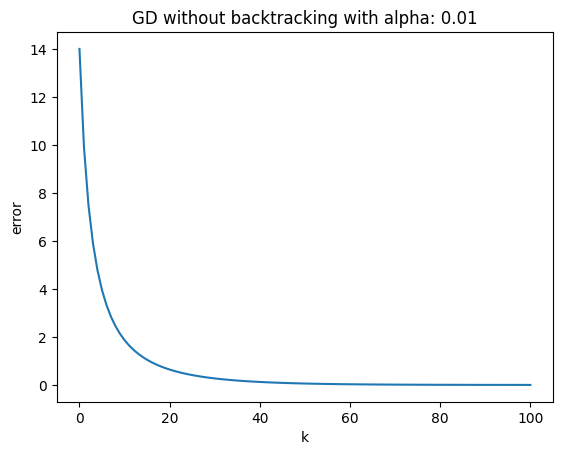

Alpha: 0.1, x0: [-1.]
11


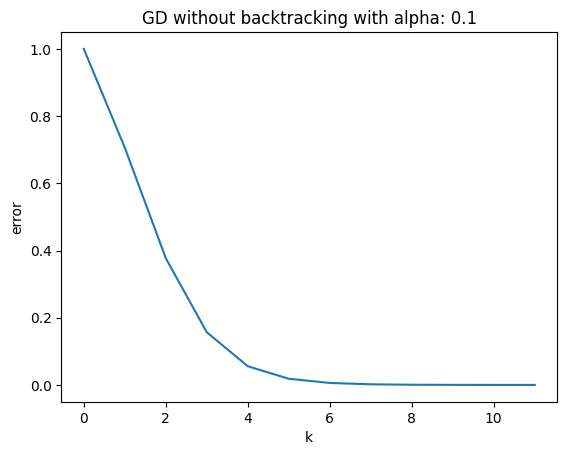

Alpha: 0.01, x0: [-1.]
100


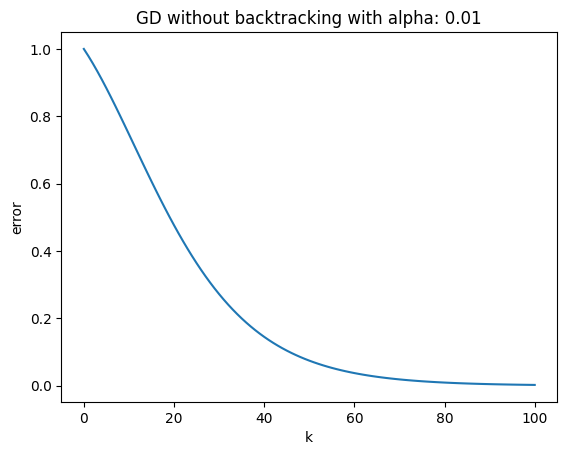

Alpha: 0.1, x0: [0.]
10


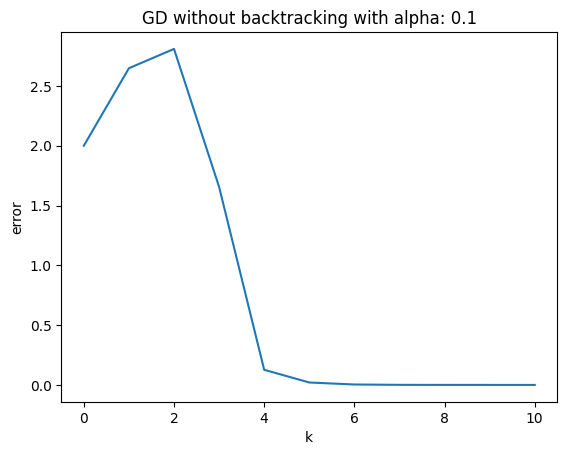

Alpha: 0.01, x0: [0.]
95


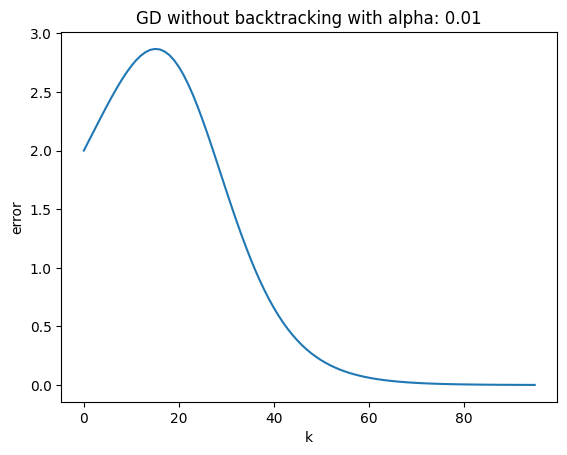

Alpha: 0.1, x0: [1.]
0


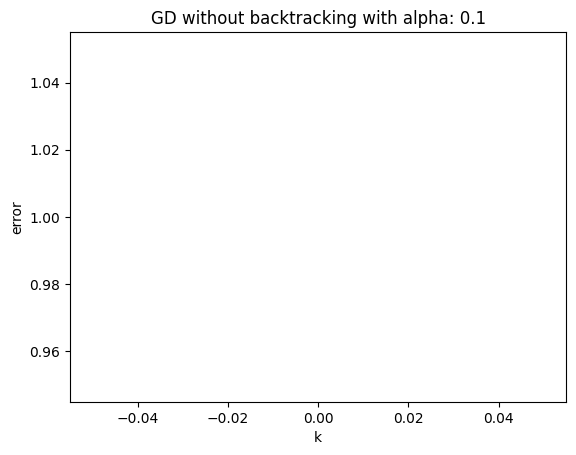

Alpha: 0.01, x0: [1.]
0


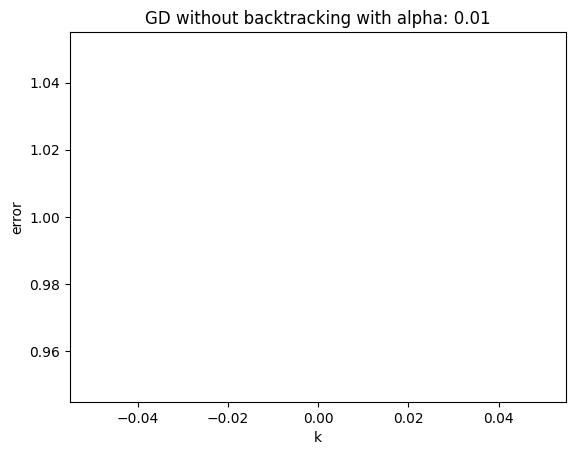

Alpha: 0.1, x0: [2.]
10


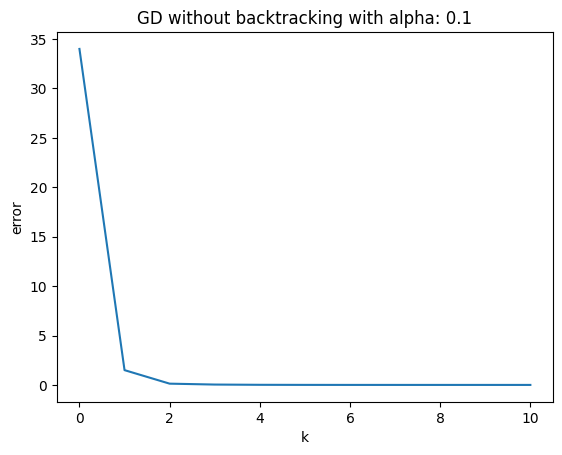

Alpha: 0.01, x0: [2.]
69


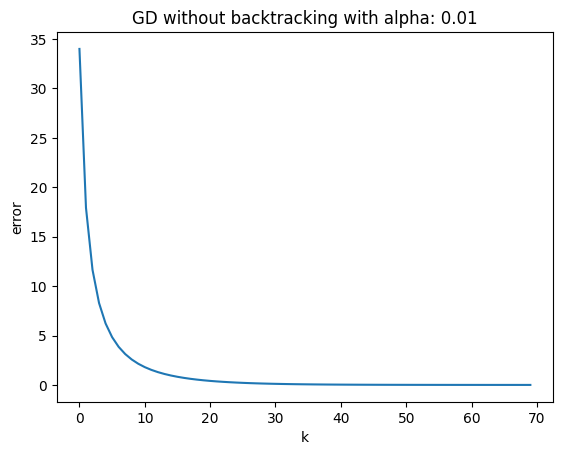

Alpha: 0.1, x0: [3.]
7


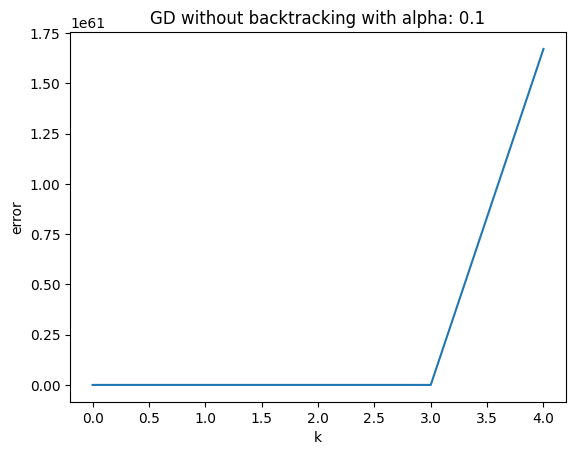

Alpha: 0.01, x0: [3.]
69


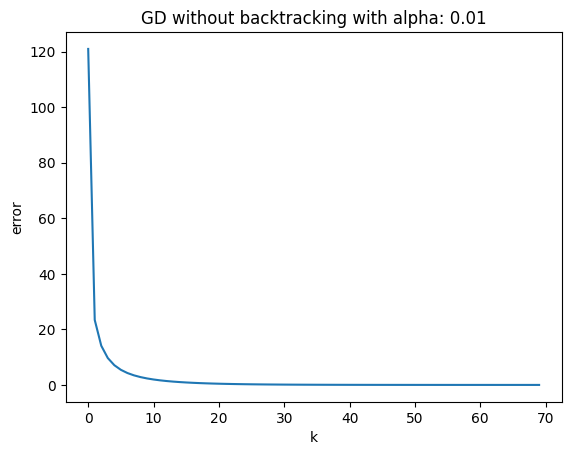

In [ ]:
x_alpha = list()
print(alpha)
for x_s in x0:
  for a in alpha:  
    print(f'Alpha: {a}, x0: {x_s}')
    x = execute(f, grad_f, x_s, kmax, tolf, tolx, alpha = a, backtrack = False)
    x_alpha.append(x)
#x_backtrack = execute(f, grad_f, x0, kmax, tolf, tolx, backtrack = True)

As it is possible to deduce from the plot of the non-convex function, the global minimum is (-1,01), and indeed in the plots above, the plot for x0 = -1 is not neither plotted and the number of iteration executed is 0, so it's clear that we are already in the optimal point.  

#STOCASTIC GRADIENT DESCENT

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.datasets import make_classification
import math

In [12]:
def SGD(f, grad_f, w0, data, batch_size, n_epochs, alpha):
    # Extract data
    x, y = data
    print(x.shape)
    # Initialize
    w_val = np.zeros((n_epochs + 1, int(w0.shape[0])))
    f_val = np.zeros((n_epochs + 1,))
    grads = np.zeros((n_epochs + 1, int(w0.shape[0]) ))
    err = np.zeros((n_epochs + 1,))
    
    # Assign values for the first iteration
    w_val[0, :] = w0
    print(w_val[0,:].shape)
    f_val[0] = f(w0, x, y)
    grads[0, :] = grad_f(w0, x, y) 
    err[0] = np.linalg.norm(grads[0, :])
    
    # Choose step size
    alpha = alpha
    
    w = w0
    # Copy the data
    x_copy = np.copy(x)
    y_copy = np.copy(y)
    # Compute the number of batch iteration for each epoch
    N = np.size(x, axis = 1)
    n_iter_per_epoch = int(N / batch_size)
    # For each epoch
    for epoch in range(1, n_epochs+1):
        
        # Inner iterations(for each batch)
        for k in range(n_iter_per_epoch):
            # Random indices that composes our mini-batch (look at np.random.choice)
            batch_idx = np.random.choice(x.shape[1], batch_size, replace = False )
           # print(batch_idx)
            # Split
            mask = np.ones((x.shape[1], ), dtype=bool)
          #  print(x.shape[1])
            mask[batch_idx] = False
            
            x_batch = x[:, ~mask]
            y_batch = y[~mask]
            
            x = x[:, mask]
            y = y[mask]
            
            # Update weights
            w = w - alpha * grad_f(w, x_batch, y_batch)
        # Refill the data
        x = np.copy(x_copy)
        y = np.copy(y_copy)
        
        # Update the values of the vector after each epoch
        w_val[epoch] = w
        f_val[epoch] = f(w_val[epoch, :], x, y)
        grads[epoch, :] = grad_f(w_val[epoch, :], x, y)
        err[epoch] = np.linalg.norm(grads[epoch, :])
       # print(f"Epoch: {epoch}, Error: {err[epoch]}")
    # Truncate the excess
    w_val  = w_val[:epoch, :]
    f_val = f_val[:epoch]
    grads = grads[:epoch, :]
    err = err[:epoch]
    
    return w_val, f_val, grads, err

In [3]:
# Define sigmoid
def sigmoid(x):
  return 1/(1 + math.exp(-x))

# Compute the value of f
def f(w, xhat):
  return sigmoid(xhat.T@w)

# Value of the loss
def ell(w, X, Y):
  d, N = X.shape
  err = 0
  for i in range(N):
    err = err + np.linalg.norm(f(w, X[:,i]) - Y[i]) ** 2 
  return err / (2*N)

# Value of the gradient
def grad_ell(w, X, Y):
  d, N = X.shape
  err = 0
  for i in range(N):
    s = f(w,X[:,i])
    err = err + s*(1-s)*X[:,i]*(f(w,X[:,i])-Y[i]) 
  return err / N
#Define softmax

#def softmax(z):
#math.exp(z)/(np.sum(math.exp))



#First example

In [6]:
n = 5
N = 100

w_t = np.ones((n))
x = np.random.rand(n, N) 

#print(x)

sigma = 0.1
shape = N
eta = np.random.normal(0, sigma, shape)

y = np.array([w_t @ x[:, k] for k in range(N) ]) 
y_tilde = np.array([(w_t @ x[:, k] + np.random.normal(0, 0.1)) for k in range(N)])
z = np.array([w_t @ (np.square(x[:, k])) for k in range(N)])

#print(y)
#print(y_tilde)
#print(z)

#def f2(w, x, y):
 #   a = np.array([(x[:, k] @ w - y[k])**2 for k in range(y.shape[0])])
  #  s = np.sum(a)
   # return s 


def f0(w, x, y):
    return 0.5 * np.linalg.norm(x.T@w - y, 2) ** 2

#print(f(w_t, x, y_tilde))
#print(f2(w_t, x, y_tilde))

#print(x.T.shape)
#print(w.shape)
#print(y.shape)


def grad_f0(w, x, y):
   return  x @(x.T@w - y) 

#print(grad_f(w_t, x , z))
#print(grad_f2(w_t, x , z))


(5, 100)
(5,)


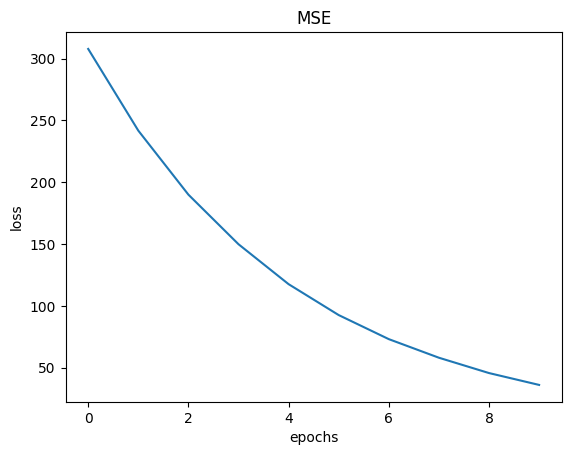

In [7]:
w0 = np.zeros((n,))
data = [x, y_tilde]
batch_size = 16
n_epochs = 10
alpha = 1e-3
w_approx, f_val, grads, err = SGD(f0, grad_f0, w0, data, batch_size, n_epochs,alpha)

plt.plot(f_val)
plt.title('MSE')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


#Plot the error for y, y_tilde and z
# Try also different epochs and batch size, also different N and n

#Simulated dataset logistic regression

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import math

# Load data
X, Y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1, 
                            n_clusters_per_class=1)
X = X.T # To make it d x N

# Check the shape
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")

# Memorize the shape
d, N = X.shape

# Add dimension on Y
Y = Y.reshape((N, 1))

Shape of X: (2, 500)
Shape of Y: (500,)


In [9]:
# Create Xhat(d+1 --> 2+1), so Xhat should have shape (d+1,N)
Xhat = np.concatenate((np.ones((1,N)), X), axis=0)
print(f"Shape of Xhat: {np.shape(Xhat)}")
np.shape(np.ones((N,1)))

Shape of Xhat: (3, 500)


(500, 1)

In [10]:
w0 = np.zeros((d+1,))
data = [Xhat, Y]
batch_size = 8
n_epochs = 5
alpha = 1e-3

w_approx, f_val, grads, err = SGD(ell, grad_ell, w0, data, batch_size, n_epochs, alpha)
print(w_approx.shape)
print(f_val)

(3, 500)
(3,)
(5, 3)
[0.125      0.1240994  0.12320611 0.12232028 0.12144351]


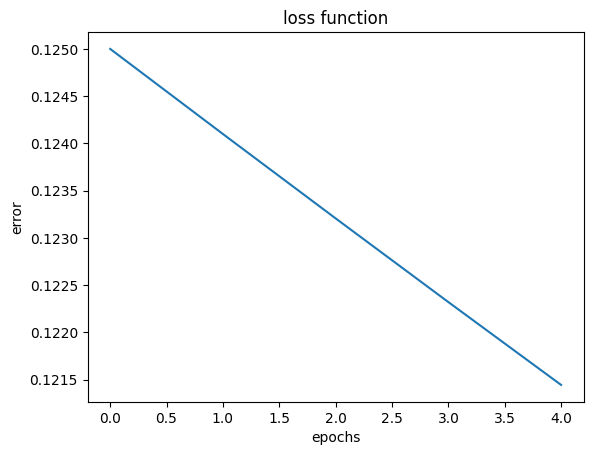

In [11]:
plt.plot(f_val)
plt.title('loss function')
plt.xlabel('epochs')
plt.ylabel('error')
plt.show()

In [12]:
def predict(w,X,threshold = 0.4):
  binary = []
  for i in range(X.shape[1]):
    f_val = f(w,X[:,i])
    if (f_val > threshold):
      binary.append(1)
    else:
      binary.append(0) 
  return binary

In [13]:
final_w = w_approx[-1,:]
final_w.shape
binary = predict(final_w,Xhat)
len(binary)

500

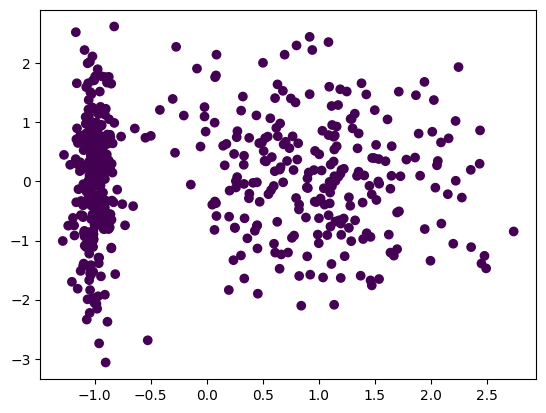

In [14]:
plt.scatter(X[0, :], X[1, :], c=binary)
plt.show()

#Training on MNIST dataset

##Data loading

In [4]:
import pandas as pd
#Load MNIST dataset 
# 1 For colab
from google.colab import drive
drive.mount('/content/drive')
# Load data into memory
data = pd.read_csv("/content/drive/MyDrive/SMMAI/data.csv") 

Mounted at /content/drive


In [5]:
# Convert data into a matrix
data = np.array(data)

print(data.shape)

# Dataset has 42_000 observations of 28 x 28 dimension
# flattening 28 x 28 -> 784 = 28 * 28 dimensional vector 

# Split data into a matrix X and a vector Y where:
#
# X is dimension (42000, 784)
# Y is dimension (42000, )
# Y is the first column of data, while X is the rest
X = data[:, 1:]
X = X.T

Y = data[:, 0]

print("")
print(X.shape, Y.shape)

d, N = X.shape

(42000, 785)

(784, 42000) (42000,)


In [6]:
# Create Xhat(d+1 --> 2+1), so Xhat should have shape (d+1,N)
Xhat = np.concatenate((np.ones((1,N)), X), axis=0)
print(f"Shape of Xhat: {np.shape(Xhat)}")

Shape of Xhat: (785, 42000)


In [7]:
def split_data(X, Y, Ntrain):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]
    
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)

#set random state for code reproducibiliy
seed = 42
np.random.seed(seed)
#random.seed(seed)
# Test it 
Ntrain = int(0.8*N)
(Xtrain, Ytrain), (Xtest, Ytest) = split_data(Xhat, Y, Ntrain)

#print(Xtrain.shape, Xtest.shape)

(785, 33600) (785, 8400)


In [8]:
#user input
digits = []
nums = 2
for i in range(nums):
  num = input('Enter a digit: ')
  digits.append(int(num))

print(digits)  

Enter a digit: 2
Enter a digit: 5
[2, 5]


In [9]:
def get_subset(X,Y,digits):
  #idx = [i for i,j in enumerate(Y) if j in digits]
  #X = X[:, idx]
  #Y = Y[idx]
  subset_X = []
  subset_Y = []
  for d in digits:
    idx = (Y==d)
    subset_X.append(X[:, idx])
    subset_Y.append(Y[idx])
  # Concatenate the data
  X_digits = np.concatenate(subset_X, axis=1)
  Y_digits = np.concatenate(subset_Y)
  return X_digits,Y_digits

In [10]:
X_train, Y_train = get_subset(Xtrain, Ytrain, digits)
#print(X_train.shape, Y_train.shape)
#ENCODING Y, digit 2 --> 0, digit 3 --> 1
Y_encoded = np.array([0 if y==digits[0] else 1 for y in Y_train])

(785, 6403) (6403,)


##Training with SGD

In [13]:
w0 = np.zeros((d+1,))
data = [X_train, Y_encoded]
batch_size = 32
n_epochs = 35
alpha = 1e-5
w_approx, f_val, grads, err = SGD(ell, grad_ell, w0, data, batch_size, n_epochs, alpha)
print(w_approx.shape)

(785, 6403)
(785,)
(35, 785)


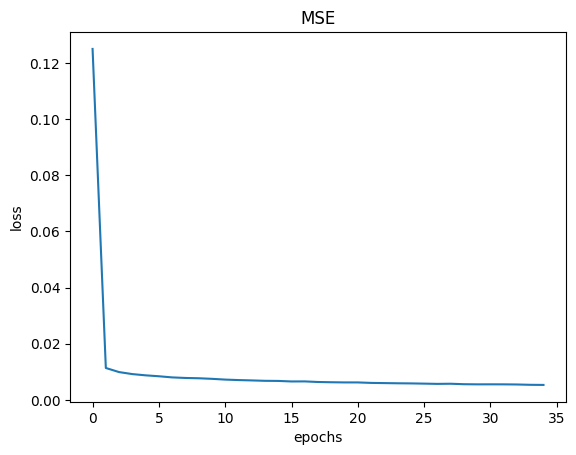

In [14]:
plt.plot(f_val)
plt.title('MSE')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

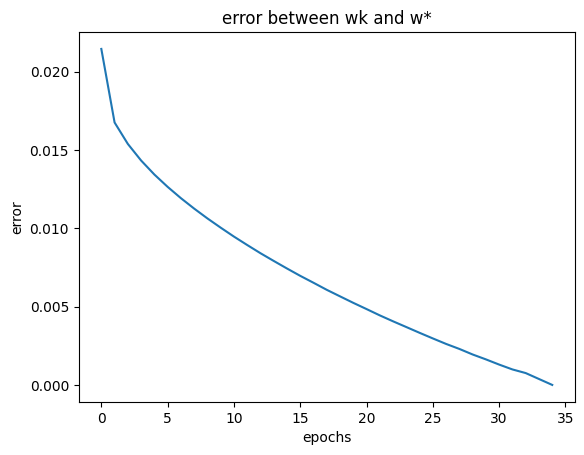

In [15]:
#get the weights of the final epoch
final_w = w_approx[-1,:]
#w_SGD = final_w
#weight error 
w_error = []
for w in w_approx:
  w_error.append(np.linalg.norm(final_w - w))
#plot the weight error
plt.plot(w_error)
plt.title('error between wk and w*')
plt.xlabel('epochs')
plt.ylabel('error')
plt.show()   

In [16]:
def predict(w,X, digits,threshold = 0.5):
  binary = []
  for i in range(X.shape[1]):
    f_val = f(w,X[:,i])
    if (f_val > threshold):
      binary.append(digits[1])
    else:
      binary.append(digits[0]) 
  return binary


In [17]:
from sklearn.metrics import accuracy_score
#predict on training data 
y_pred = predict(final_w,X_train,digits)
#compute accuracy score
acc = accuracy_score(Y_train,y_pred)
print(f'Accuracy on training set: {acc*100}')

Accuracy on training set: 98.90676245509917


In [18]:
#prediction on test data
X_test, Y_test = get_subset(Xtest,Ytest,digits)
print(X_test.shape,Y_test.shape)
y_pred = predict(final_w,X_test,digits)
acc = accuracy_score(Y_test,y_pred)
print(f'Accuracy on test set: {acc*100}')

(785, 1569) (1569,)
Accuracy on test set: 98.08795411089865


In [57]:
print(Y_train[:10])
print(y_pred[:10])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

##Training with GD

In [19]:
# The gradient_descent implementation.
# We don't know the final length of the arrays because the gradient can 
# converge early than expected. So we put a limit on the maxium number of iteration
def GD(f, grad_f, w0, data, kmax, tolf, tolx, alpha, backtrack = False):
    # Initialization
    k = 0
    n = int(w0.shape[0])
    w = np.zeros((kmax + 1, n))
    f_val = np.zeros((kmax + 1, ))
    grads = np.zeros((kmax + 1, n))
    err = np.zeros((kmax + 1, ))
    x, y = data

    # Assign the values for the first iteration, start point(k=0)
    w[k, :] = w0
    f_val[k] = f(w0,x,y)
    grads[k, :] = grad_f(w0,x,y)
    # the err is a vector, because it's the norm of the gradient   
    err[k] = np.linalg.norm(grads[k, :])
    
    # Choose step size
    alpha = alpha
    
    # Handle the condition for the first iteration (x[k,:] - x[k-1,:])
    
    if k == 0:
        w[k-1, :] = np.ones((n,))
        #x[k-1, :] = x[-1, :]
        
    
    # Start the iterations
    while ((k < kmax) and (err[k] >= (tolf * err[0])) and (np.linalg.norm(w[k,:] - w[k-1,:]) >= tolx)):
        # Update the value of x
        w[k+1, :] = w[k, :] - alpha * grads[k, :]
        
        # Update the step size alpha with backtracking, it computes a good alpha which ensures the convergence of the gradient
        if(backtrack):
          alpha = backtracking(f, grad_f, w[k, :])
        
        # Update the values of the actual iteration
        k = k+1
        f_val[k] = f(w[k, :], x, y) 
        grads[k, :] = grad_f(w[k, :], x, y)
        err[k] = np.linalg.norm(grads[k, :])
    
    # Truncate the vectors that are (eventually) too long because maybe we have reached the convergence before the stopping value kmax
    w = w[:k+1, :] 
    f_val = f_val[:k+1]
    grads = grads[: k+1]
    err = err[: k+1]
    
    return w, k, f_val, grads, err

In [20]:
#compute training with GD
#intialization
w0 = np.zeros((d+1,))
alpha = 1e-5
kmax = 60
tolf = 1e-7
tolx = 1e-5
data = [X_train, Y_encoded]

w_approx, k, f_val, grads, err = GD(ell, grad_ell, w0, data, kmax, tolf, tolx, alpha)

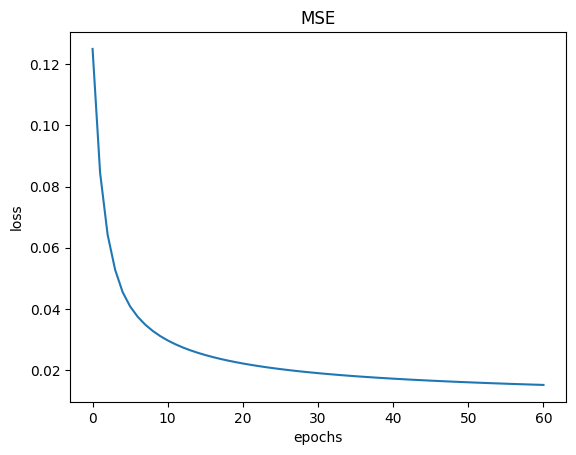

In [21]:
plt.plot(f_val)
plt.title('MSE with GD')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

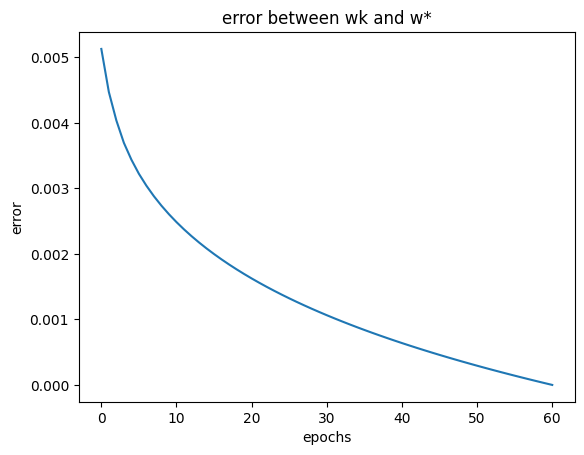

In [22]:
#get the weights of the final epoch
final_w = w_approx[-1,:]
#w_GD = final_w
#weight error 
w_error = []
for wk in w_approx:
  w_error.append(np.linalg.norm(final_w - wk))
#plot the weight error
plt.plot(w_error)
plt.title('error between wk and w*')
plt.xlabel('epochs')
plt.ylabel('error')
plt.show()   

In [23]:
#predict on training data
y_pred = predict(final_w,X_train,digits)
#compute accuracy score
acc = accuracy_score(Y_train,y_pred)
print(f"Accuracy on training set: {acc*100}%")

Accuracy on training set: 97.1888177416836%


In [24]:
#prediction on test data
X_test, Y_test = get_subset(Xtest,Ytest,digits)
#print(X_test.shape,Y_test.shape)
y_pred = predict(final_w,X_test,digits)
#compute accuracy score
acc = accuracy_score(Y_test,y_pred)
print(f"Accuracy on test set: {acc*100}%")

(785, 1569) (1569,)
Accuracy on test set: 97.25940089228808%


##Different training set size 

In [61]:
def execution(ell, grad_ell, w0, data, batch_size, n_epochs, alpha, Ntrain, digits, kmax, tolf, tolx, SGD_on = True):
  Xhat, Y = data
  (Xtrain, Ytrain), (Xtest, Ytest) = split_data(Xhat, Y, int(Ntrain))
  #print(f"X_train shape: {Xtrain.shape}, Y_train shape{Ytrain.shape}")
  X_train, Y_train = get_subset(Xtrain, Ytrain, digits)
  #encode Y, digit 2 --> 0, digit 3 --> 1
  Y_encoded = np.array([0 if y==digits[0] else 1 for y in Y_train])
  d = [X_train, Y_encoded]
  #TRAINING
  if (SGD_on):
    w, f_val, grads, err = SGD(ell, grad_ell, w0, d, batch_size, n_epochs, alpha)
    algorithm = 'SGD'
  else:
    w, k, f_val, grads, err = GD(ell, grad_ell, w0, d, kmax, tolf, tolx, alpha)
    algorithm = 'GD'
  #PLOTTING
  show_plots(f_val, w, err, algorithm)
  
  #PREDICTION
  #get the weights of the final epoch
  final_w = w_approx[-1,:]
  #final_w.shape
  #predict on training data 
  y_pred = predict(final_w,X_train,digits)
  #compute accuracy score
  train_acc = accuracy_score(Y_train,y_pred)
  #prediction on test data
  X_test, Y_test = get_subset(Xtest,Ytest,digits)
  #print(X_test.shape,Y_test.shape)
  y_pred = predict(final_w,X_test,digits)
  test_acc = accuracy_score(Y_test,y_pred)
  return w, f_val, grads, err, train_acc, test_acc

def show_plots(f_val, w, grad_err,algorithm):
  plt.plot(grad_err)
  plt.title(f'{algorithm} MSE')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.show()
  #get the weights of the final epoch
  final_w = w[-1,:]
  #weight error 
  w_error = []
  for wk in w_approx:
    w_error.append(np.linalg.norm(final_w - wk))
  #plot the weight error
  plt.plot(w_error)
  plt.title(f'error between wk and w* in {algorithm}')
  plt.xlabel('epochs')
  plt.ylabel('error')
  plt.show()   

(785, 7576)
(785,)


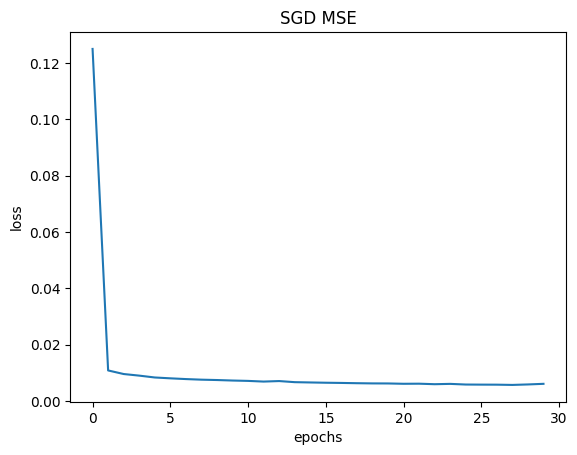

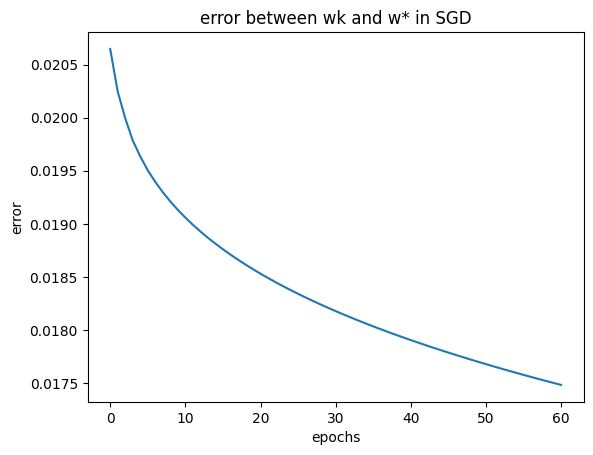

(785, 396) (396,)
Accuracy on training set(SGD): 97.2544878563886%
Accuracy on test set(SGD): 96.21212121212122%


In [36]:
#N is the tot number of samples 
Ntrain = 0.65*N
w0 = np.zeros((d+1,))
data = [Xhat, Y]
batch_size = 32
n_epochs = 40
alpha = 1e-5
#convergence parameters for GD
kmax = 60
tolf = 1e-7
tolx = 1e-5

#To use GD instead of SGD, put SGD false
w, f_val, grads, err, train_acc, test_acc = execution(ell, grad_ell, w0, data, batch_size, n_epochs, 
                                                      alpha, Ntrain, digits, kmax, tolf, tolx, SGD_on=True)
print(f'Accuracy on training set(SGD): {train_acc*100}%')
print(f'Accuracy on test set(SGD): {test_acc*100}%')


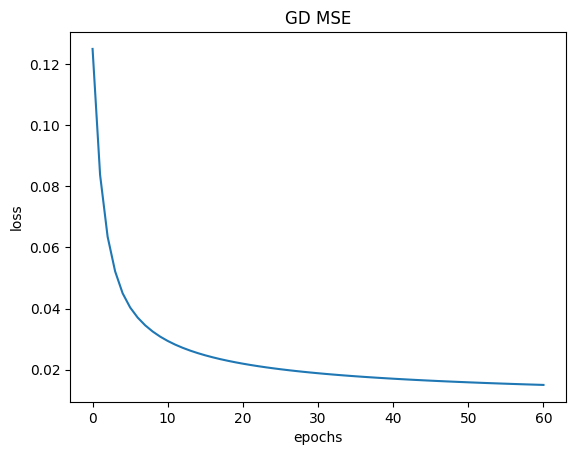

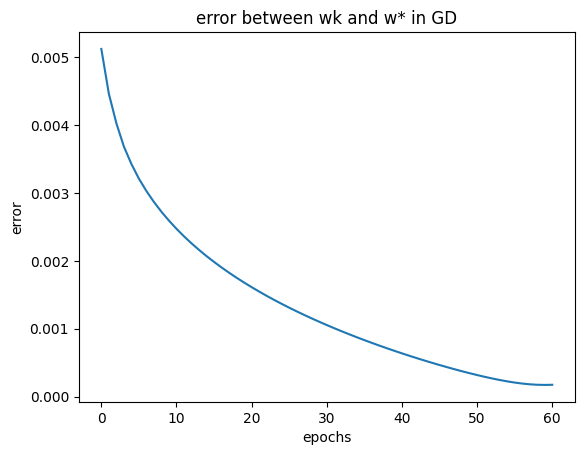

(785, 416) (416,)
Accuracy on training set(GD): 97.24722075172049%
Accuracy on test set(GD): 96.39423076923077%


In [38]:
#To use GD instead of SGD, put SGD false
w, f_val, grads, err, train_acc, test_acc = execution(ell, grad_ell, w0, data, batch_size, n_epochs, 
                                                      alpha, Ntrain, digits, kmax, tolf, tolx, SGD_on=False)
print(f'Accuracy on training set(GD): {train_acc*100}%')
print(f'Accuracy on test set(GD): {test_acc*100}%')


##Different digits

In [52]:
#user input(3,8)<-- interesting case
digits2 = []
nums = 2
for i in range(nums):
  num = input('Enter a digit: ')
  if num in digits:
    raise Exception(f"Please put a different digit from {digits[0]} and {digits[1]}")
  digits2.append(int(num))

print(digits2) 
digits = digits2

Enter a digit: 6
Enter a digit: 9
[6, 9]


(785, 6645)
(785,)


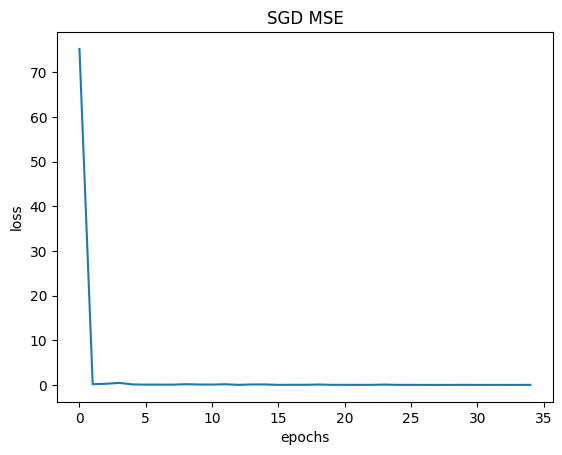

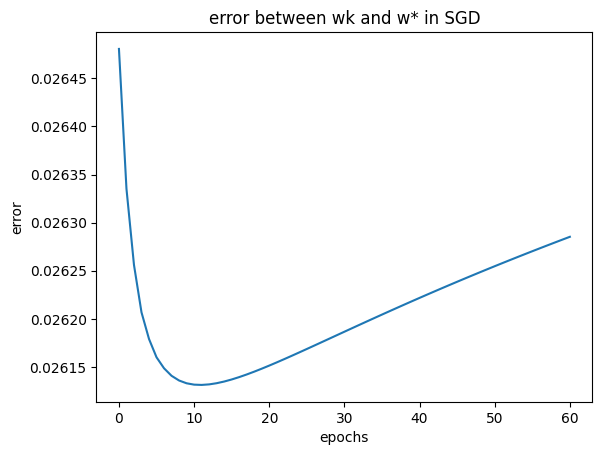

Accuracy on training set(SGD): 69.52595936794582%
Accuracy on test set(SGD): 69.52380952380952%


In [62]:
#N is the tot number of samples 
Ntrain = 0.80*N
w0 = np.zeros((d+1,))
data = [Xhat, Y]
batch_size = 32
n_epochs = 40
alpha = 1e-5
#convergence parameters for GD
kmax = 60
tolf = 1e-7
tolx = 1e-5

w, f_val, grads, err, train_acc, test_acc = execution(ell, grad_ell, w0, data, batch_size, n_epochs, alpha, Ntrain, digits, kmax,tolf,tolx, SGD_on = True)
print(f'Accuracy on training set(SGD): {train_acc*100}%')
print(f'Accuracy on test set(SGD): {test_acc*100}%')


It's possibe to note form the above training is that using digits which are more similar, the model accuracies on training and test set, both are very low wrt to considering 2 digits which are quite different one form another.

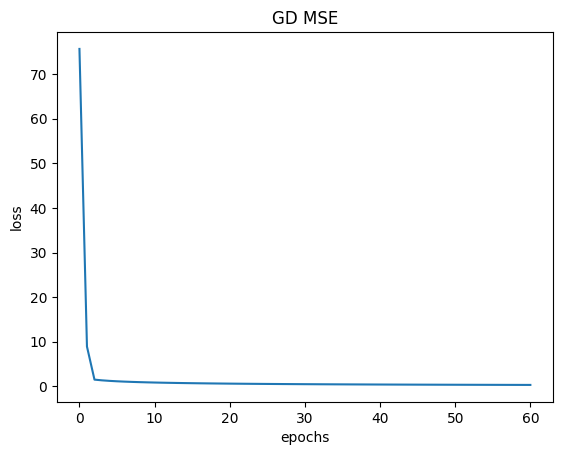

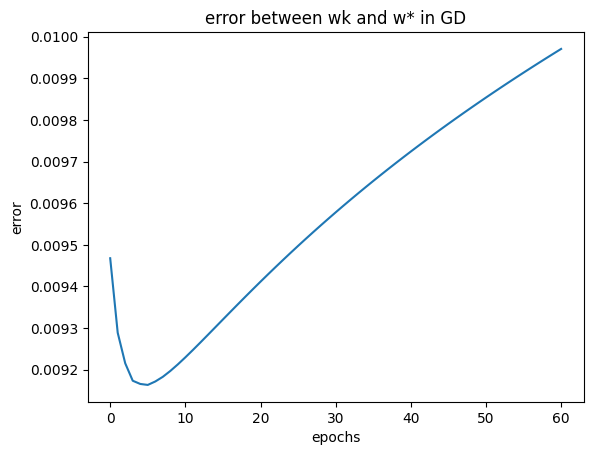

Accuracy on training set(GD): 69.38130362787896%
Accuracy on test set(GD): 70.09512485136742%


In [63]:
#To use GD instead of SGD, put SGD false
w, f_val, grads, err, train_acc, test_acc = execution(ell, grad_ell, w0, data, batch_size, n_epochs, 
                                                      alpha, Ntrain, digits, kmax, tolf, tolx, SGD_on=False)
print(f'Accuracy on training set(GD): {train_acc*100}%')
print(f'Accuracy on test set(GD): {test_acc*100}%')


##Compare with PCA and LDA

In [55]:
from IPython.core.oinspect import find_file
def get_subset(X,Y,digits):
  #idx = [i for i,j in enumerate(Y) if j in digits]
  #X = X[:, idx]
  #Y = Y[idx]
  subset_X = []
  subset_Y = []
  for d in digits:
    idx = (Y==d)
    subset_X.append(X[:, idx])
    subset_Y.append(Y[idx])
  # Concatenate the data
  X_digits = np.concatenate(subset_X, axis=1)
  Y_digits = np.concatenate(subset_Y)
  return X_digits,Y_digits

def get_centroid(X):
  centroid = np.mean(X, axis = 1)
  return centroid

def truncated_matrix(U,s,VT,k):
  Uk = U[:,:k]
  sk = s[:k]
  VTk = VT[:k, :]
  return Uk,sk,VTk


#compute the digits clusters
def get_clusters(Z,Y,digits):
  clusters=[]
  for d in digits:
    idx = (Y==d)
    clusters.append(Z[:,idx])
  return clusters

# Visualize the clusters
def plot(Z,Y,digits,k):
  clusters = get_clusters(Z,Y,digits)
  plt.figure(figsize=(12,6))
  #scatter plot with a legend
  if(k==2):
    sc = plt.scatter(Z[0,:], Z[1,:], c=Y, cmap='tab10')
    plt.legend(*sc.legend_elements(), title='clusters')
    for i,cluster in enumerate(clusters):
      centroid = get_centroid(cluster)
      plt.plot(centroid[0],centroid[1],'*', color='r')
  if(k==3):
    ax = plt.axes(projection='3d')
    sc = ax.scatter(Z[0,:], Z[1,:], Z[2,:], c=Y, cmap='tab10')
    plt.legend(*sc.legend_elements(), title='clusters')
    for i,cluster in enumerate(clusters):
      centroid = get_centroid(cluster)
      ax.plot(centroid[0],centroid[1],centroid[2], '*', color='yellow')
  plt.show()


# compute distances between the points of a cluster and its centroid
def compute_distances(clusters, Y, digits):
  distances = []
  #clusters = get_clusters(Z,Y,digits)
  for d,cluster in enumerate(clusters):
    centroid = get_centroid(cluster)
    sum = 0
    for i in range(0, cluster.shape[1]):
      sum = sum + np.linalg.norm(cluster[:,i] - centroid)
    average_distance = sum / cluster.shape[1]
    print(f"Average_distance for cluster of digit {digits[d]}(shape: {cluster.shape}) from its centroid is {average_distance}")
    distances.append(average_distance)

#classify the cluster of a point x 
def classification_accuracy(X,Y,clusters,P,digits):
  #clusters = get_clusters(Z,Y,digits)
  centroids = []
  correct = 0
  for cluster in clusters:
    centroids.append(get_centroid(cluster))
  for i in range(0,X.shape[1]):
    distances = []
    x = X[:,i]
    #project the point x into the projection space
    projected_x = P@x 
    #print(x.shape, centroids[0].shape)
    for centroid in centroids:
      distances.append(np.linalg.norm(projected_x-centroid))
   #if(check):
     #print(distances)
      #print(f"argmin: {np.argmin(distances)}")
      #print(f"predicted: {digits[np.argmin(distances)]}")
      #check=False
    #take the minimum distance
    predicted = digits[np.argmin(distances)]
    if(predicted == Y[i]):
      correct+=1
  #print(f"the point x is more closer to the cluster of digit {predicted}")
  accuracy = (correct/X.shape[1])*100
  #print("Accuracy is: ", accuracy, "%")
  return accuracy


In [56]:
import scipy
import scipy.sparse
import scipy.sparse.linalg

#m2 = u2 @ np.diag(s2) @ vh2  # rank-2 approx
def PCA(X,Y,k):
  #compute centroid 
  centroid = get_centroid(X)
  #reshape
  centroid = np.reshape(centroid,(centroid.shape[0], 1))
  Xc = X - centroid
  U, s, VT = np.linalg.svd(Xc, full_matrices=False)
  #Uk is the truncated projection matrix
  #Uk, sk, VTk = truncated_matrix(U,s,VT,k)
  Uk = U[:,:k]
  #projected space
  Zk = Uk.T@Xc
  return Zk, Uk.T

#LDA
def LDA(X,Y,digits,k):
  clusters = get_clusters(X,Y,digits)
  centroids = []
  centered_clusters = []
  Xbar = []
  global_centroid = get_centroid(X)
  for cluster in clusters:
    centroid = get_centroid(cluster)
    #centroids.append(get_centroid(cluster))
    new_cluster = cluster - centroid.reshape((centroid.shape[0],1)) 
    centered_clusters.append(new_cluster)
    # Compute the Xbar
    Xbar.append(np.repeat(centroid.reshape(centroid.shape[0], 1), cluster.shape[1], axis=1))
  # Compute the within-cluster matrix by concatenation
  Xw = np.concatenate(centered_clusters, axis=1)
  # Compute the within-cluster scatter matrix (the correlation matrix for points inside of each cluster.)
  Sw = Xw @ Xw.T
  #Compute the Xbar
  Xbar = np.concatenate(Xbar, axis=1)
  # Compute the between-cluster centered dataset
  Xbarc = Xbar - global_centroid.reshape((global_centroid.shape[0], 1))
  # Compute the between-cluster scatter matrix
  Sb = Xbarc @ Xbarc.T
  # We want to compute the Cholesky decomposition of Sw
  try:
    L = np.linalg.cholesky(Sw)
  except:
    epsilon = 1e-6
    Sw = Sw + epsilon * np.eye(Sw.shape[0])
    L = np.linalg.cholesky(Sw)
  # Compute the first k eigenvector decomposition of L^-1 Sb L
  _, W = scipy.sparse.linalg.eigs(np.linalg.inv(L) @ Sb @ L, k=k)
  W = np.real(W)
  # Compute Q(projection matrix)
  Q = np.linalg.inv(L).T @ W
  # Compute the projection space
  Z = Q.T @ X
  return Z, Q.T

In [57]:
def execute_train(Xtrain, Ytrain, digits, k, algorithm, verbose = False):
  X, Y = get_subset(Xtrain, Ytrain, digits)
  if(verbose):
    print(f"Training with {algorithm}")
    print(f"shape of X:{X.shape}, shape of Y: {Y.shape}")
  #Z:projected space, Uk <--> projection matrix, 
  if (algorithm == 'PCA'):
    Z, projection_matrix = PCA(X,Y,k)
  elif (algorithm == 'LDA'):
    Z, projection_matrix = LDA(X,Y, digits,k)
  else: raise Exception("The algorithm variable should be 'PCA' or 'LDA'")
  if(verbose):
    print(f"shape of projected_space:{Z.shape}")
    print(f"shape of projection_matrix:{projection_matrix.shape}")
  #clusters from the projection space
  clusters = get_clusters(Z,Y,digits)
  if(k==2 and verbose):
    plot(Z,Y,digits,k)
  if(verbose):
    compute_distances(clusters,Y,digits)
  train_accuracy = classification_accuracy(X,Y, clusters, projection_matrix, digits)
  if(verbose):
    print(f"Accuracy on training set is: {train_accuracy}%")
    print("------------------------------------------------------------------------")

  return train_accuracy, projection_matrix, clusters

#Test set
def execute_test(Xtest, Ytest, projection_matrix, train_clusters, algorithm, digits, k, verbose = False):
  X_test,Y_test = get_subset(Xtest, Ytest, digits)

  if(verbose):
    print(f"Test with {algorithm}")
    print(f"X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape} ")
  #project the test data in the projection space
  Z_test = projection_matrix @ X_test
  if(verbose):
    print(f"Z_test shape: {Z_test.shape}")
  test_clusters = get_clusters(Z_test, Y_test, digits)
  #plot
  #if(k==2 and verbose):
    #plot(Z_test, Y_test, digits,k)
  if(verbose):
    compute_distances(test_clusters, Y_test, digits)
  #to classify the test set, do we should use the training clusters and not the test clusters? --> ASK  
  #predicting the test data wrt test clusters is not too smart
  test_accuracy = classification_accuracy(X_test,Y_test, train_clusters, projection_matrix, digits)
  #test_accuracy = classification_accuracy(X_test,Y_test, test_clusters, projection_matrix, digits)
  if(verbose):
    print(f"Accuracy on test set with {algorithm} is: {test_accuracy}%")
    print("------------------------------------------------------------------------")
  return test_accuracy


In [64]:
#projected space dimension
k= 50
Ntrain = 0.8*N
(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, Y, int(Ntrain))
#the prefix p stands for PCA, and l stands for LDA
print(f"cosidered digits:{digits[0], digits[1]}")
p_train_acc, p_projection_matrix, p_train_clusters = execute_train(Xtrain,Ytrain,digits,k,'PCA',True)
l_train_acc, l_projection_matrix, l_train_clusters = execute_train(Xtrain,Ytrain,digits,k,'LDA',True)
p_test_accuracy = execute_test(Xtest, Ytest, p_projection_matrix,p_train_clusters,'PCA', digits, k, True)
l_test_accuracy = execute_test(Xtest, Ytest, l_projection_matrix,l_train_clusters,'LDA', digits, k, True)
#train_acc, projection_matrix, train_clusters = PCA_train(Xtrain,Ytrain,digits,k, True)
#test_acc = PCA_test(Xtest,Ytest, projection_matrix, train_clusters,digits,k,True)


cosidered digits:(6, 9)
Training with PCA
shape of X:(784, 6702), shape of Y: (6702,)
shape of projected_space:(50, 6702)
shape of projection_matrix:(50, 784)
Average_distance for cluster of digit 6(shape: (50, 3342)) from its centroid is 1518.6538530224543
Average_distance for cluster of digit 9(shape: (50, 3360)) from its centroid is 1422.8056838340644
Accuracy on training set is: 97.8961504028648%
------------------------------------------------------------------------
Training with LDA
shape of X:(784, 6702), shape of Y: (6702,)
shape of projected_space:(50, 6702)
shape of projection_matrix:(50, 784)
Average_distance for cluster of digit 6(shape: (50, 3342)) from its centroid is 0.009665646486889603
Average_distance for cluster of digit 9(shape: (50, 3360)) from its centroid is 0.008989515056148013
Accuracy on training set is: 99.80602805132797%
------------------------------------------------------------------------
Test with PCA
X_test shape: (784, 1623), Y_test shape: (1623,) 
Z